## AWS EC2 with Boto3 Python Tutorial 

https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html

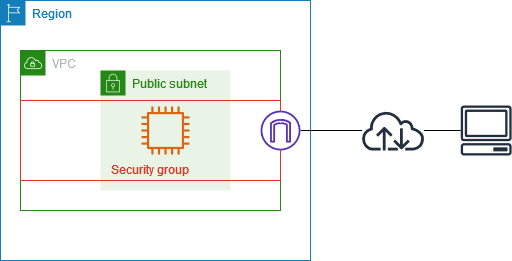

Amazon Elastic Compute Cloud (Amazon EC2) is a web service that provides resizeable computing capacity in servers in Amazon's data centers—that you use to build and host your software systems.

- Create Key-Pair for Secure Connection
- Create an Amazon EC2 instance
    - test with ip address in browser
    - test with ssh connection
- Create Security Group and add rules to it
- Attaching and Detaching Security Groups to Amazon EC2 instances
    - test with ip address in browser
    - test with ssh connection
- Start, Stop and Delete Amazon EC2 instances

## Create Key-Pair for Secure Connection

In [7]:
import boto3

In [19]:
import boto3
ec2 = boto3.client('ec2', region_name='us-east-1')  # Replace 'us-east-1' with your desired region
ec2

In [20]:
ec2.describe_instances()

{'Reservations': [],
 'ResponseMetadata': {'RequestId': '5438d559-9d51-4bc0-a250-595d1ea8803b',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5438d559-9d51-4bc0-a250-595d1ea8803b',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '219',
   'date': 'Thu, 09 Jan 2025 17:25:02 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

Creating a Key-Pair

In [26]:
response = ec2.create_key_pair(KeyName='SanjeevB')

In [28]:
file = open("cred/SanjeevB.pem",'w')
file.write(response['KeyMaterial'])
file.close()

## Create an Amazon EC2 instance

In [32]:

resp = ec2.run_instances(
    ImageId='ami-01816d07b1128cd2d',  # Replace with your desired AMI ID
    MinCount=1,
    MaxCount=1,
    InstanceType='t2.micro',  # Replace with your desired instance type
    KeyName='SanjeevB',  # Replace with your key pair name
    BlockDeviceMappings=[  # Corrected `BlockDeviceMapping` syntax
        {
            "DeviceName": "/dev/xvda",
            "Ebs": {
                'DeleteOnTermination': True,
                'VolumeSize': 20
            }
        }
    ]
)


In [33]:
resp

{'ReservationId': 'r-059d1a944cb804cfc',
 'OwnerId': '324037308755',
 'Groups': [],
 'Instances': [{'Architecture': 'x86_64',
   'BlockDeviceMappings': [],
   'ClientToken': '91c9b138-de72-44f2-8f84-aac50844e1fb',
   'EbsOptimized': False,
   'EnaSupport': True,
   'Hypervisor': 'xen',
   'NetworkInterfaces': [{'Attachment': {'AttachTime': datetime.datetime(2025, 1, 9, 17, 41, 2, tzinfo=tzutc()),
      'AttachmentId': 'eni-attach-053cbfc7552ed6ae1',
      'DeleteOnTermination': True,
      'DeviceIndex': 0,
      'Status': 'attaching',
      'NetworkCardIndex': 0},
     'Description': '',
     'Groups': [{'GroupId': 'sg-0476aab69fd2360fe', 'GroupName': 'default'}],
     'Ipv6Addresses': [],
     'MacAddress': '12:86:00:69:f8:8d',
     'NetworkInterfaceId': 'eni-05b38b9afe95d649a',
     'OwnerId': '324037308755',
     'PrivateDnsName': 'ip-172-31-89-178.ec2.internal',
     'PrivateIpAddress': '172.31.89.178',
     'PrivateIpAddresses': [{'Primary': True,
       'PrivateDnsName': 'ip-172

In [34]:
ec2.describe_instances()

{'Reservations': [{'ReservationId': 'r-0021e911f257c34e3',
   'OwnerId': '324037308755',
   'Groups': [],
   'Instances': [{'Architecture': 'x86_64',
     'BlockDeviceMappings': [],
     'ClientToken': 'd795c5cf-bd12-44f8-8af8-d5bbc4d68ce5',
     'EbsOptimized': False,
     'EnaSupport': True,
     'Hypervisor': 'xen',
     'NetworkInterfaces': [],
     'RootDeviceName': '/dev/xvda',
     'RootDeviceType': 'ebs',
     'SecurityGroups': [],
     'StateReason': {'Code': 'Client.UserInitiatedShutdown',
      'Message': 'Client.UserInitiatedShutdown: User initiated shutdown'},
     'VirtualizationType': 'hvm',
     'CpuOptions': {'CoreCount': 1, 'ThreadsPerCore': 1},
     'CapacityReservationSpecification': {'CapacityReservationPreference': 'open'},
     'HibernationOptions': {'Configured': False},
     'MetadataOptions': {'State': 'pending',
      'HttpTokens': 'required',
      'HttpPutResponseHopLimit': 2,
      'HttpEndpoint': 'enabled',
      'HttpProtocolIpv6': 'disabled',
      'Ins

## Create Security Group and add rules to it
- Security groups control inbound and outbound traffic of the EC2 instance network interface.
- every EC2 instance must have at least one Security Group associated with it. If no Security Group has been specified during the EC2 instance launch, the default Security Group of the default VPC is associated with the instance.

In [37]:
resp = ec2.describe_security_groups()
resp = ec2.create_security_group(
    GroupName ='Sanjeev',
    Description = "Security Group for Testing"

)

In [38]:
resp

{'GroupId': 'sg-09801880fca0cad43',
 'SecurityGroupArn': 'arn:aws:ec2:us-east-1:324037308755:security-group/sg-09801880fca0cad43',
 'ResponseMetadata': {'RequestId': '28f925a2-6ad1-402d-9228-5cac718feca1',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '28f925a2-6ad1-402d-9228-5cac718feca1',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '373',
   'date': 'Fri, 10 Jan 2025 09:44:01 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

In [39]:
security_group_id=resp['GroupId']
security_group_id

'sg-09801880fca0cad43'

In [41]:
resp = ec2.authorize_security_group_ingress(
    GroupId=security_group_id,  # Replace with your actual security group ID
    IpPermissions=[
        {
            'IpProtocol': 'tcp',
            'FromPort': 22,
            'ToPort': 22,  # SSH
            'IpRanges': [{'CidrIp': '0.0.0.0/0'}]  # Allow from all IPs
        }
    ]
)

print(resp)


{'Return': True, 'SecurityGroupRules': [{'SecurityGroupRuleId': 'sgr-0981b46c58a8b00b7', 'GroupId': 'sg-09801880fca0cad43', 'GroupOwnerId': '324037308755', 'IsEgress': False, 'IpProtocol': 'tcp', 'FromPort': 22, 'ToPort': 22, 'CidrIpv4': '0.0.0.0/0', 'SecurityGroupRuleArn': 'arn:aws:ec2:us-east-1:324037308755:security-group-rule/sgr-0981b46c58a8b00b7'}], 'ResponseMetadata': {'RequestId': '0065dea3-c667-4037-a9f2-2d5be569ae46', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '0065dea3-c667-4037-a9f2-2d5be569ae46', 'cache-control': 'no-cache, no-store', 'strict-transport-security': 'max-age=31536000; includeSubDomains', 'content-type': 'text/xml;charset=UTF-8', 'content-length': '696', 'date': 'Fri, 10 Jan 2025 09:54:16 GMT', 'server': 'AmazonEC2'}, 'RetryAttempts': 0}}


In [42]:
resp

{'Return': True,
 'SecurityGroupRules': [{'SecurityGroupRuleId': 'sgr-0981b46c58a8b00b7',
   'GroupId': 'sg-09801880fca0cad43',
   'GroupOwnerId': '324037308755',
   'IsEgress': False,
   'IpProtocol': 'tcp',
   'FromPort': 22,
   'ToPort': 22,
   'CidrIpv4': '0.0.0.0/0',
   'SecurityGroupRuleArn': 'arn:aws:ec2:us-east-1:324037308755:security-group-rule/sgr-0981b46c58a8b00b7'}],
 'ResponseMetadata': {'RequestId': '0065dea3-c667-4037-a9f2-2d5be569ae46',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '0065dea3-c667-4037-a9f2-2d5be569ae46',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '696',
   'date': 'Fri, 10 Jan 2025 09:54:16 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

In [44]:
#connecting the ec2 instance to the security group
ec2.describe_instances()

{'Reservations': [{'ReservationId': 'r-059d1a944cb804cfc',
   'OwnerId': '324037308755',
   'Groups': [],
   'Instances': [{'Architecture': 'x86_64',
     'BlockDeviceMappings': [{'DeviceName': '/dev/xvda',
       'Ebs': {'AttachTime': datetime.datetime(2025, 1, 9, 17, 41, 3, tzinfo=tzutc()),
        'DeleteOnTermination': True,
        'Status': 'attached',
        'VolumeId': 'vol-028e60d7fe45f7ad0'}}],
     'ClientToken': '91c9b138-de72-44f2-8f84-aac50844e1fb',
     'EbsOptimized': False,
     'EnaSupport': True,
     'Hypervisor': 'xen',
     'NetworkInterfaces': [{'Association': {'IpOwnerId': 'amazon',
        'PublicDnsName': 'ec2-52-87-191-55.compute-1.amazonaws.com',
        'PublicIp': '52.87.191.55'},
       'Attachment': {'AttachTime': datetime.datetime(2025, 1, 9, 17, 41, 2, tzinfo=tzutc()),
        'AttachmentId': 'eni-attach-053cbfc7552ed6ae1',
        'DeleteOnTermination': True,
        'DeviceIndex': 0,
        'Status': 'attached',
        'NetworkCardIndex': 0},
    

In [45]:
#lets add the seurity group we created to the inbound rule

response = ec2.describe_instances()

instance_id=response['Reservations'][0]['Instances'][0]['InstanceId']
#this is the instance we created

'i-0265b6ba6a3fa0678'

In [48]:
old_gid=response['Reservations'][0]['Instances'][0]['SecurityGroups'][0]['GroupId']

In [50]:
ec2.modify_instance_attribute(InstanceId=instance_id,Groups=[security_group_id])


{'ResponseMetadata': {'RequestId': '31bb65ec-6f19-4162-9ce2-c002db3ad7fd',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '31bb65ec-6f19-4162-9ce2-c002db3ad7fd',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '235',
   'date': 'Fri, 10 Jan 2025 10:19:59 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

## Start, Stop and Delete Amazon EC2 instances

In [61]:
# to check the status of the MLops --> running,stopped,temrinated,pending,etc.
# to re start the status again we have to see if its pending and then running 
import time 

# lets create a function to check the status of the instance:
def wait_for_status(instance_id,target_status):
    while True:
        response= ec2.describe_instances(InstanceIds=instance_id) #gets the description of the instance

        status = response['Reservations'][0]['Instances'][0]['State']['Name']

        if status == target_status:
            print("Instance is in {} state".format(target_status))
            break
        
        time.sleep(10)

def start_instances(instance_id):
    print("EC2 Instance Start")
    ec2.start_instances(InstanceIds=instance_id)
    wait_for_status(instance_id,'running')

start_instances([instance_id])





EC2 Instance Start
Instance is in running state


In [60]:
def stop_instances(instance_id):
    print("EC2 Instance Stop")
    ec2.stop_instances(InstanceIds=instance_id)
    wait_for_status(instance_id,'stopped')
stop_instances([instance_id])


EC2 Instance Stop
Instance is in stopped state


In [62]:
def terminate_instances(instance_id):
    print("EC2 Instance Termination")
    ec2.terminate_instances(InstanceIds=instance_id)
    wait_for_status(instance_id,'terminated')
terminate_instances([instance_id])


EC2 Instance Termination
Instance is in terminated state
